In [1]:
from keras . datasets import cifar10

# Load the CIFAR -10 dataset
( train_images , train_labels ) , ( test_images ,test_labels ) = cifar10 . load_data ()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


170498071/170498071 [==============================] - 18s 0us/step


In [2]:
from tensorflow import keras
import matplotlib . pyplot as plt
import numpy as np
from  sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras . utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# concatenate all the images into a single array
images = np . concatenate (( train_images , test_images ), axis =0)
labels = np . concatenate (( train_labels , test_labels ), axis =0)

# random shullfe the images and labels
indices = np . random . permutation ( len ( images ))
images = images [ indices ]
labels = labels [ indices ]

#split data into training ,validation and test sets
train_images , test_images , train_labels , test_labels = train_test_split ( images , labels , test_size =0.2)
train_images , valid_images , train_labels , valid_labels = train_test_split( train_images , train_labels , test_size =0.25)

# convert to numpy arrays
train_images = np . array ( train_images )
test_images = np . array ( test_images )
valid_images = np . array ( valid_images )
train_labels = np . array ( train_labels )
test_labels = np . array ( test_labels )
valid_labels = np . array ( valid_labels )

# normalize the images
train_images = train_images . astype ( 'float32' ) / 255
test_images = test_images . astype ( 'float32' ) / 255
valid_images = valid_images . astype ( 'float32' ) / 255



In [3]:
# calculate the total number element for each class in the dataset
unique , counts = np . unique ( train_labels , return_counts = True )

print ( dict ( zip ( unique , counts )))

{0: 3663, 1: 3573, 2: 3644, 3: 3625, 4: 3557, 5: 3567, 6: 3628, 7: 3588, 8: 3582, 9: 3573}


In [4]:
# from keras . models import Sequential
# from keras . layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout
# from keras . optimizers import Adam
# from keras . losses import sparse_categorical_crossentropy

# def run_model(learning_rate):
#     # create the model
#     CNN_model = Sequential ()

#     # add layers

#     CNN_model.add(Conv2D(filters =128 , kernel_size =(3 ,3) ,padding='same', activation = 'relu' , input_shape =(32 ,32 ,3)))
#     CNN_model.add(MaxPooling2D(pool_size =(2 ,2)))
#     CNN_model.add(Conv2D(filters =64 , kernel_size =(3 ,3) , padding='same',activation = 'relu'))
#     CNN_model.add(MaxPooling2D(pool_size =(2 ,2)))
#     CNN_model.add(Dropout(0.3))
#     CNN_model.add(Conv2D(filters =32 , kernel_size =(3 ,3) ,padding='same', activation = 'relu'))
#     CNN_model.add(MaxPooling2D(pool_size =(2 ,2)))
#     CNN_model.add(Flatten())   
#     CNN_model.add(Dense(512 , activation = 'relu'))
#     CNN_model.add(Dropout(0.3)) 
#     CNN_model.add(Dense(10 , activation = 'softmax'))

#     # compile the model
#     CNN_model.compile(loss= sparse_categorical_crossentropy , optimizer = Adam ( learning_rate=learning_rate) , metrics =[ 'accuracy' ])

#     # train the model
#     model_history=CNN_model.fit(train_images , train_labels , batch_size =512 , epochs =20 ,validation_data =( valid_images , valid_labels ))
    
#     return CNN_model, model_history



In [5]:
import tensorflow as tf
from keras.applications import InceptionV3
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

# Create a Sequential model
fine_tuned_model = Sequential()

# Add a Resizing layer to adjust the input size to 75x75
fine_tuned_model.add(tf.keras.layers.experimental.preprocessing.Resizing(75, 75, input_shape=(32, 32, 3)))

# Load the pre-trained InceptionV3 (GoogLeNet) model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Add the InceptionV3 base model to your new model
fine_tuned_model.add(base_model)

# Add custom layers on top of InceptionV3
fine_tuned_model.add(GlobalAveragePooling2D())
fine_tuned_model.add(Dense(512, activation='tanh'))
fine_tuned_model.add(Dropout(0.5))
fine_tuned_model.add(Dense(10, activation='softmax'))

# Compile the model
fine_tuned_model.compile(loss=sparse_categorical_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model using your data
model_history = fine_tuned_model.fit(train_images, train_labels, batch_size=512, epochs=20, validation_data=(valid_images, valid_labels))



87910968/87910968 [==============================] - 4s 0us/step
Epoch 1/20
71/71 [==============================] - 39s 296ms/step - loss: 1.0440 - accuracy: 0.6392 - val_loss: 7.6912 - val_accuracy: 0.1063
Epoch 2/20
71/71 [==============================] - 16s 219ms/step - loss: 0.3811 - accuracy: 0.8770 - val_loss: 1.0416 - val_accuracy: 0.7064
Epoch 3/20
71/71 [==============================] - 16s 219ms/step - loss: 0.2267 - accuracy: 0.9259 - val_loss: 1.1834 - val_accuracy: 0.6762
Epoch 4/20
71/71 [==============================] - 16s 219ms/step - loss: 0.1569 - accuracy: 0.9486 - val_loss: 0.8962 - val_accuracy: 0.7573
Epoch 5/20
71/71 [==============================] - 16s 219ms/step - loss: 0.1255 - accuracy: 0.9604 - val_loss: 0.7355 - val_accuracy: 0.7987
Epoch 6/20
71/71 [==============================] - 16s 219ms/step - loss: 0.0999 - accuracy: 0.9672 - val_loss: 0.7522 - val_accuracy: 0.8097
Epoch 7/20
71/71 [==============================] - 15s 218ms/step - loss: 0.

In [6]:
fine_tuned_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 75, 75, 3)         0         
                                                                 
 inception_v3 (Functional)   (None, 1, 1, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                        

In [7]:
import pandas as pd

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

data = {"Epochs ": range(1, 21), "Training loss ": train_loss, "Validation loss ": val_loss}
df = pd.DataFrame(data)
df

,Epochs,Training loss,Validation loss
0,1,1.043961,7.691170
1,2,0.381107,1.041599
2,3,0.226673,1.183366
3,4,0.156941,0.896160
4,5,0.125542,0.735536
5,6,0.099928,0.752157
6,7,0.087796,0.622562
7,8,0.069097,0.875360
8,9,0.057175,0.758897
9,10,0.061681,1.090129


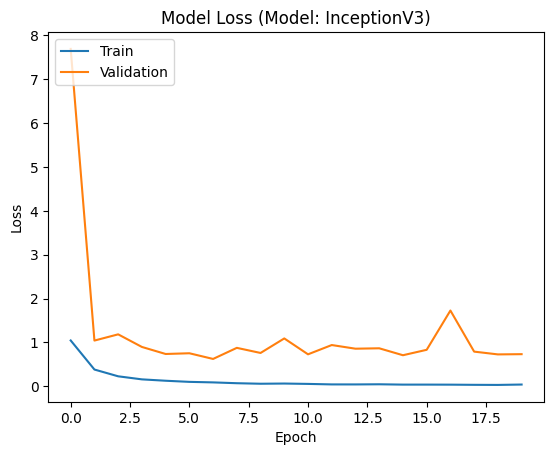

In [8]:
# plot the loss
plt . plot ( model_history . history [ 'loss' ])
plt . plot ( model_history . history [ 'val_loss' ])
plt . title ( f'Model Loss (Model: InceptionV3)')
plt . ylabel ( 'Loss' )
plt . xlabel ( 'Epoch' )
plt . legend ([ 'Train' , 'Validation' ], loc = 'upper left' )
plt . show ()

In [9]:
model_history . history [ 'loss' ]

[1.0439605712890625,
 0.3811071217060089,
 0.22667305171489716,
 0.1569414734840393,
 0.1255417913198471,
 0.09992771595716476,
 0.08779647201299667,
 0.06909657269716263,
 0.05717529356479645,
 0.061681341379880905,
 0.053294889628887177,
 0.04183673858642578,
 0.041422583162784576,
 0.04475335404276848,
 0.03718262538313866,
 0.03740173578262329,
 0.03625974431633949,
 0.032299965620040894,
 0.030211880803108215,
 0.03895765170454979]

375/375 [==============================] - 7s 14ms/step


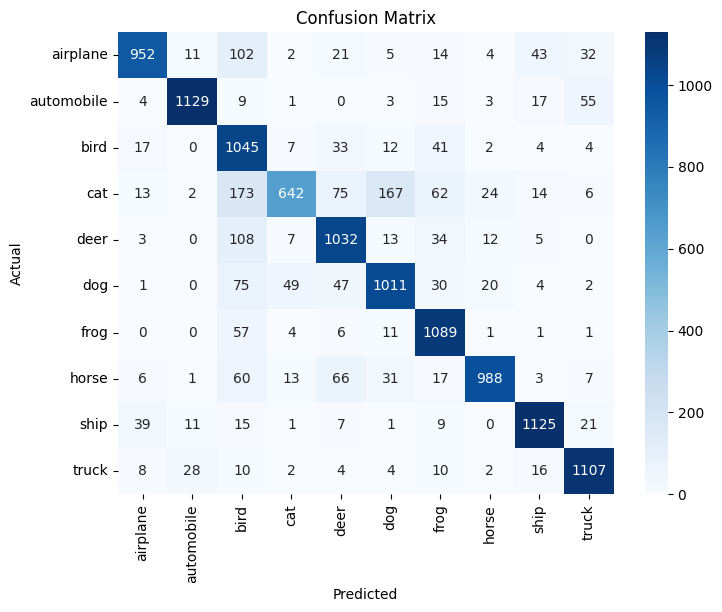

F1 score:  0.8417034978143955
Precision score:  0.8554106329876028
Recall score:  0.8428656467095094


In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score

# Predict the labels of the test set
test_predicted_labels = fine_tuned_model.predict(test_images)

# Convert predictions classes to one hot vectors
test_predicted_labels = np.argmax(test_predicted_labels, axis=1)


conf_matrix = confusion_matrix(test_labels, test_predicted_labels)

# Plot confusion matrix using seaborn heatmap
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

# Print f1, precision, and recall scores
print("F1 score: ", f1_score(test_labels, test_predicted_labels, average='macro'))
print("Precision score: ", precision_score(test_labels, test_predicted_labels, average='macro'))
print("Recall score: ", recall_score(test_labels, test_predicted_labels, average='macro'))
